**MAS 651 Final Project:** Amazon Movie Recommendation System utilizing Item-Based, User-Based, SVD, and GridSearch CV Models

*Team Members:*
1. Andreina Diaz
2. Andrew Wolfe

Imported libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
!pip install scikit-surprise
from surprise import Dataset
from surprise.model_selection import GridSearchCV
from surprise import SVD
from surprise import Reader
from surprise.prediction_algorithms import knns
from surprise import KNNBasic
from surprise.similarities import cosine, msd, pearson
from surprise import accuracy
from surprise.model_selection import train_test_split

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 772.0/772.0 kB 5.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp310-cp310-linux_x86_64.whl size=3163008 sha256=d2f06b6667dcfdffbaa962bdd1ec840440840a9633f803a559fecc66fdcca8a9
  Stored in directory: /root/.cache/pip/wheels/a5/ca/a8/4e28def53797fdc4363ca4af740db15a9c2f1595ebc51fb445
Successfully built scikit-surprise


Mounted drive to retrieve CSV file

Read in the data as CSV

In [ ]:
amazon = pd.read_csv('https://raw.githubusercontent.com/awolfe4/ML-Project/main/Amazon.csv')

 We examined the first 15 rows of the dataset, which was represented in a 'wider' format. This format typically implies that each row contains multiple columns of data, possibly resulting in a larger dataset size

In [ ]:
amazon.head(15)

,user_id,Movie1,Movie2,Movie3,Movie4,Movie5,Movie6,Movie7,Movie8,Movie9,...,Movie197,Movie198,Movie199,Movie200,Movie201,Movie202,Movie203,Movie204,Movie205,Movie206
0,A3R5OBKS7OM2IR,5.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AH3QC2PC1VTGP,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,A3LKP6WPMP9UKX,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AVIY68KEPQ5ZD,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,A1CV1WROP5KTTW,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,AP57WZ2X4G0AA,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,A3NMBJ2LCRCATT,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,A5Y15SAOMX6XA,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,A3P671HJ32TCSF,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,A3VCKTRD24BG7K,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


This code was used to see the columns in this dataset which is in "wider" format.

In [ ]:
amazon.columns

Index(['user_id', 'Movie1', 'Movie2', 'Movie3', 'Movie4', 'Movie5', 'Movie6',
       'Movie7', 'Movie8', 'Movie9',
       ...
       'Movie197', 'Movie198', 'Movie199', 'Movie200', 'Movie201', 'Movie202',
       'Movie203', 'Movie204', 'Movie205', 'Movie206'],
      dtype='object', length=207)

This data, which is in wider format, has 4848 rows and 207 columns.

In [ ]:
amazon.shape

(4848, 207)

The statistics below show that there NaN values, this is expected as the NA values are for Users who did not watched the movie.

In [ ]:
amazon.describe()

,Movie1,Movie2,Movie3,Movie4,Movie5,Movie6,Movie7,Movie8,Movie9,Movie10,...,Movie197,Movie198,Movie199,Movie200,Movie201,Movie202,Movie203,Movie204,Movie205,Movie206
count,1.0,1.0,1.0,2.0,29.000000,1.0,1.0,1.0,1.0,1.0,...,5.000000,2.0,1.0,8.000000,3.000000,6.000000,1.0,8.000000,35.000000,13.000000
mean,5.0,5.0,2.0,5.0,4.103448,4.0,5.0,5.0,5.0,5.0,...,3.800000,5.0,5.0,4.625000,4.333333,4.333333,3.0,4.375000,4.628571,4.923077
std,NaN,NaN,NaN,0.0,1.496301,NaN,NaN,NaN,NaN,NaN,...,1.643168,0.0,NaN,0.517549,1.154701,1.632993,NaN,1.407886,0.910259,0.277350
min,5.0,5.0,2.0,5.0,1.000000,4.0,5.0,5.0,5.0,5.0,...,1.000000,5.0,5.0,4.000000,3.000000,1.000000,3.0,1.000000,1.000000,4.000000
25%,5.0,5.0,2.0,5.0,4.000000,4.0,5.0,5.0,5.0,5.0,...,4.000000,5.0,5.0,4.000000,4.000000,5.000000,3.0,4.750000,5.000000,5.000000
50%,5.0,5.0,2.0,5.0,5.000000,4.0,5.0,5.0,5.0,5.0,...,4.000000,5.0,5.0,5.000000,5.000000,5.000000,3.0,5.000000,5.000000,5.000000
75%,5.0,5.0,2.0,5.0,5.000000,4.0,5.0,5.0,5.0,5.0,...,5.000000,5.0,5.0,5.000000,5.000000,5.000000,3.0,5.000000,5.000000,5.000000
max,5.0,5.0,2.0,5.0,5.000000,4.0,5.0,5.0,5.0,5.0,...,5.000000,5.0,5.0,5.000000,5.000000,5.000000,3.0,5.000000,5.000000,5.000000


We used the melt procedure to transform the data from "wider" format to "longer" format.

In [ ]:
movies = amazon.melt(id_vars='user_id', var_name='Movie', value_name='Rating')

print(movies.head(15))

           user_id   Movie  Rating
0   A3R5OBKS7OM2IR  Movie1     5.0
1    AH3QC2PC1VTGP  Movie1     NaN
2   A3LKP6WPMP9UKX  Movie1     NaN
3    AVIY68KEPQ5ZD  Movie1     NaN
4   A1CV1WROP5KTTW  Movie1     NaN
5    AP57WZ2X4G0AA  Movie1     NaN
6   A3NMBJ2LCRCATT  Movie1     NaN
7    A5Y15SAOMX6XA  Movie1     NaN
8   A3P671HJ32TCSF  Movie1     NaN
9   A3VCKTRD24BG7K  Movie1     NaN
10   ANF0AGIV0JCH2  Movie1     NaN
11  A3LDEBLV6MVUBE  Movie1     NaN
12  A1R2XZWQ6NM5M1  Movie1     NaN
13  A36L1XGA5AQIJY  Movie1     NaN
14  A2HWI21H23GDS4  Movie1     NaN


In [ ]:
movies.describe()

,Rating
count,5000.000000
mean,4.385600
std,1.199667
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


The longer format shows that this data has 998688 rows and 3 columns (user_id, Movie, Rating)  

In [ ]:
movies.shape

(998688, 3)



There are 206 unique amazon movies in this dataset:




In [ ]:
num_unique_movies = movies['Movie'].nunique()
print("Number of unique movies:", num_unique_movies)

Number of unique movies: 206


There are 4,848 unique users in this dataset:

In [ ]:
num_unique_users = movies['user_id'].nunique()
print("Number of unique users:", num_unique_users)

Number of unique users: 4848


Created Nested For Loop to print out the highly correlated movies, positive correlations indicate that viewers who enjoy one movie tend to enjoy the other. Negative correlation between movies imply that viewers who like a movie may not necessarily enjoy the other, and vice versa.


In [ ]:
correlation_matrix = amazon.iloc[:, 1:].corr()
upper = correlation_matrix.where(pd.np.triu(pd.np.ones(correlation_matrix.shape), k=1).astype(bool))

correlated_movies_df = pd.DataFrame(columns=['Movie 1', 'Movie 2', 'Correlation'])

for movie1 in upper.columns:
    for movie2 in upper.index:
        correlation = upper.loc[movie2, movie1]
        if pd.notnull(correlation):
            correlated_movies_df = correlated_movies_df.append({'Movie 1': movie1, 'Movie 2': movie2, 'Correlation': correlation}, ignore_index=True)

print(correlated_movies_df)

<ipython-input-12-c9bb76bb07b8>:2: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  upper = correlation_matrix.where(pd.np.triu(pd.np.ones(correlation_matrix.shape), k=1).astype(bool))
<ipython-input-12-c9bb76bb07b8>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  correlated_movies_df = correlated_movies_df.append({'Movie 1': movie1, 'Movie 2': movie2, 'Correlation': correlation}, ignore_index=True)
<ipython-input-12-c9bb76bb07b8>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  correlated_movies_df = correlated_movies_df.append({'Movie 1': movie1, 'Movie 2': movie2, 'Correlation': correlation}, ignore_index=True)
<ipython-input-12-c9bb76bb07b8>:10: FutureWarning: The frame.append method is deprecated and will be removed f

    Movie 1   Movie 2  Correlation
0   Movie91   Movie89     1.000000
1   Movie92   Movie89     0.516398
2   Movie92   Movie91    -0.139876
3  Movie103   Movie89     0.423077
4  Movie103   Movie92     0.355643
5  Movie127  Movie103     0.288675
6  Movie163  Movie162     1.000000
7  Movie185  Movie162     1.000000
8  Movie185  Movie163     1.000000


Created a heat map to visualize the correlated movies.

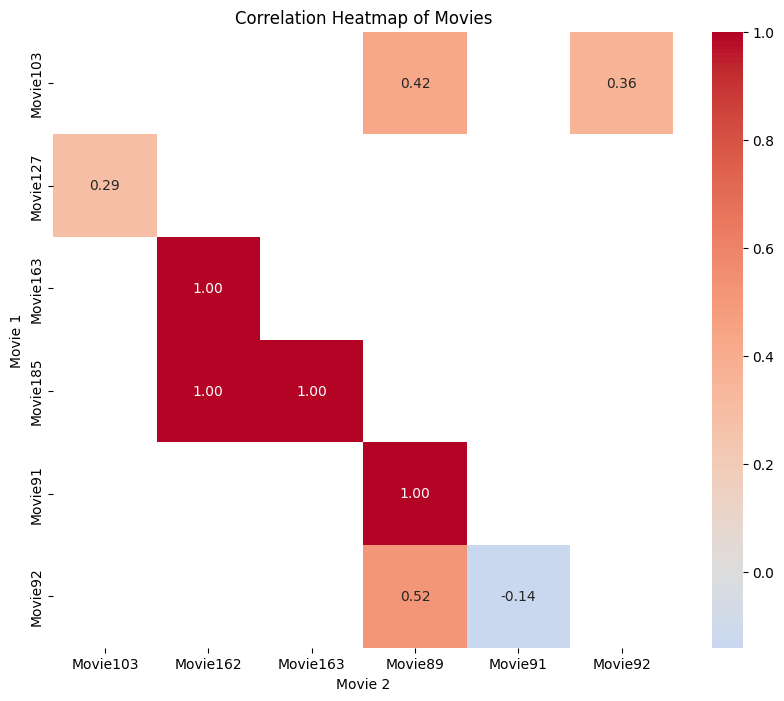

In [ ]:
heatmap_data = correlated_movies_df.pivot(index='Movie 1', columns='Movie 2', values='Correlation')

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, cmap='coolwarm', annot=True, fmt=".2f", center=0)
plt.title('Correlation Heatmap of Movies')
plt.xlabel('Movie 2')
plt.ylabel('Movie 1')
plt.show()

Visualized the Movie Rating Disctibution by Counts to see how most movies are rated in this dataset. This shows that most movies in this dataset have high ratings.

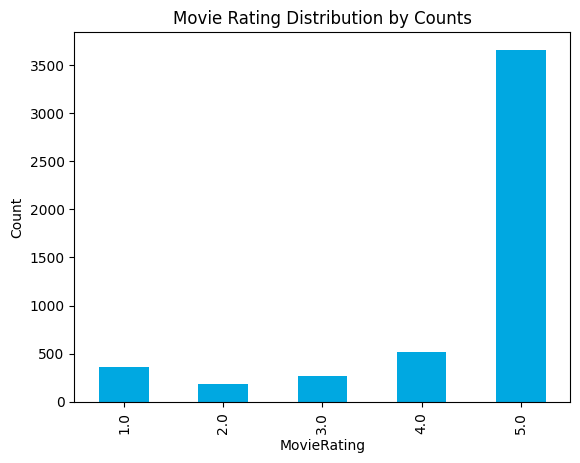

In [ ]:
movies.groupby('Rating')['user_id'].count().plot(kind='bar', color='#00A8E1')
plt.xlabel('MovieRating')
plt.ylabel('Count')
plt.title('Movie Rating Distribution by Counts')
plt.show()

Visualized the Distribution of User Ratings to showcase how most viewers/users rate movies.  

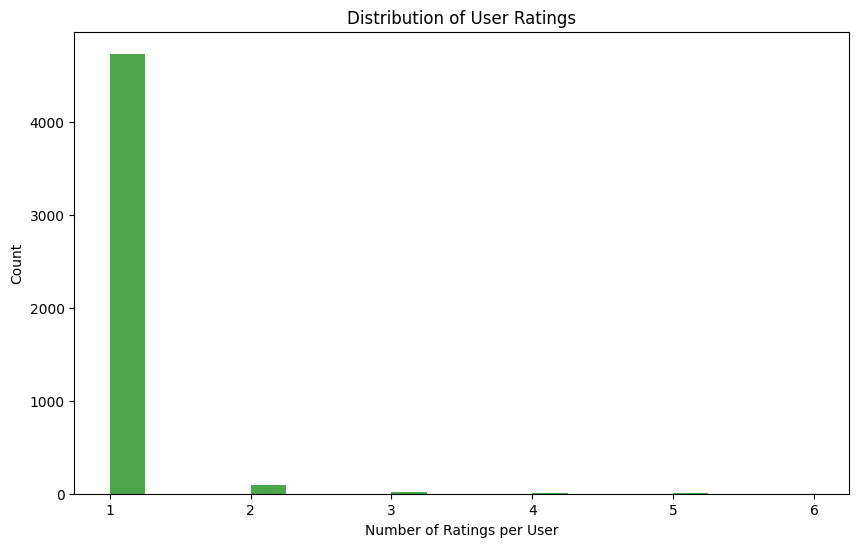

In [ ]:
user_rate = pd.DataFrame(movies.groupby("user_id",as_index = False).agg({'Rating':['count','mean']}))
plt.figure(figsize=(10, 6))
plt.hist(user_rate['Rating']['count'], bins=20, color='green', alpha=0.7)
plt.xlabel('Number of Ratings per User')
plt.ylabel('Count')
plt.title('Distribution of User Ratings')
plt.grid(False)
plt.show()

**Box Plot Findings:**
In analyzing the box plot, we determined a skewness coefficient of approximately -1.913. This indicates that while the majority of ratings tend towards the higher end, as observed in our rating distribution, there are still outliers and lower ratings influencing the plot. In summary, it suggests that the dataset predominantly consists of positive reviews, yet there are instances of notably negative feedback as well.

Skewness: -1.912848252112055


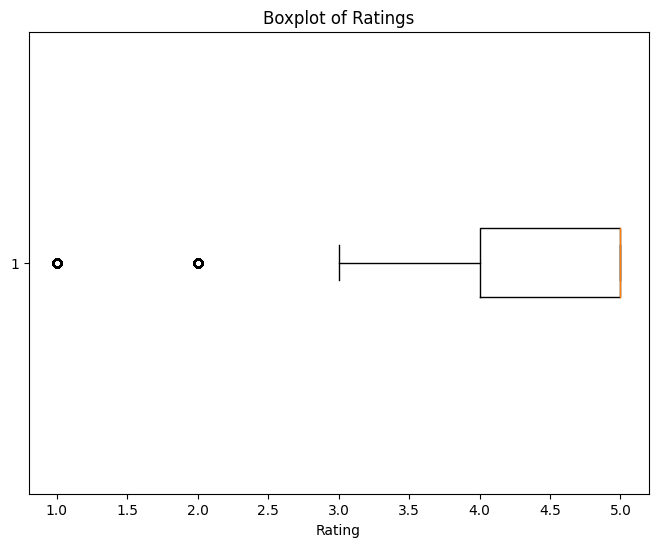

In [ ]:
skewness = movies['Rating'].skew()
print("Skewness:", skewness)

plt.figure(figsize=(8, 6))
plt.boxplot(movies['Rating'].dropna(), vert=False)
plt.title('Boxplot of Ratings')
plt.xlabel('Rating')
plt.grid(False)
plt.show()

**Top 5 most watched Amazon movies**

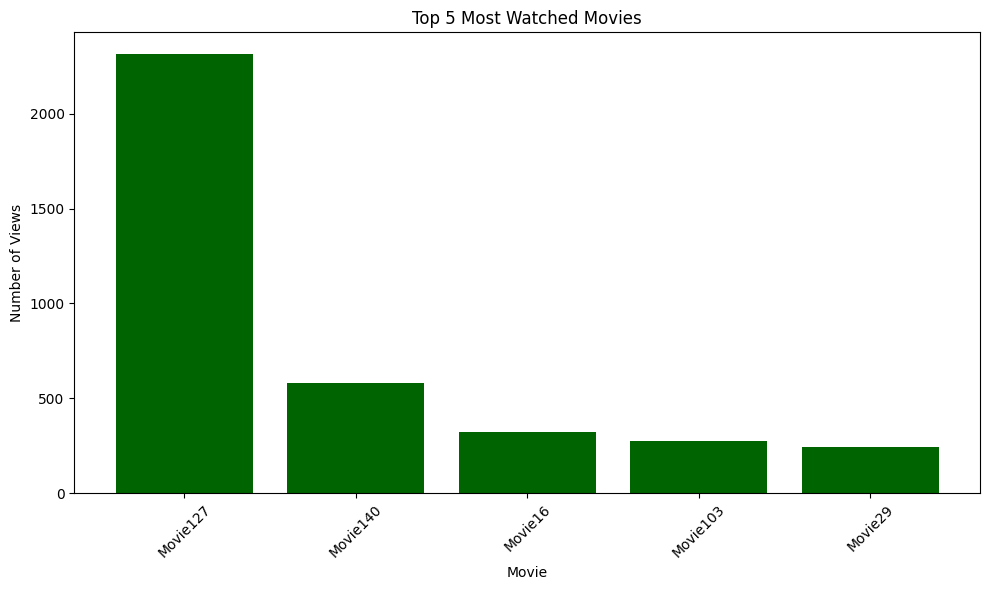

In [ ]:
movie_counts = movies.groupby('Movie')['Rating'].count().reset_index()
top_movies = movie_counts.sort_values(by='Rating', ascending=False)
top5= top_movies.head(5)


plt.figure(figsize=(10, 6))
plt.bar(top5['Movie'], top5['Rating'], color='darkgreen')
plt.xlabel('Movie')
plt.ylabel('Number of Views')
plt.title('Top 5 Most Watched Movies')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The top 5 amazon movies with the highest average ratings based on user ratings.

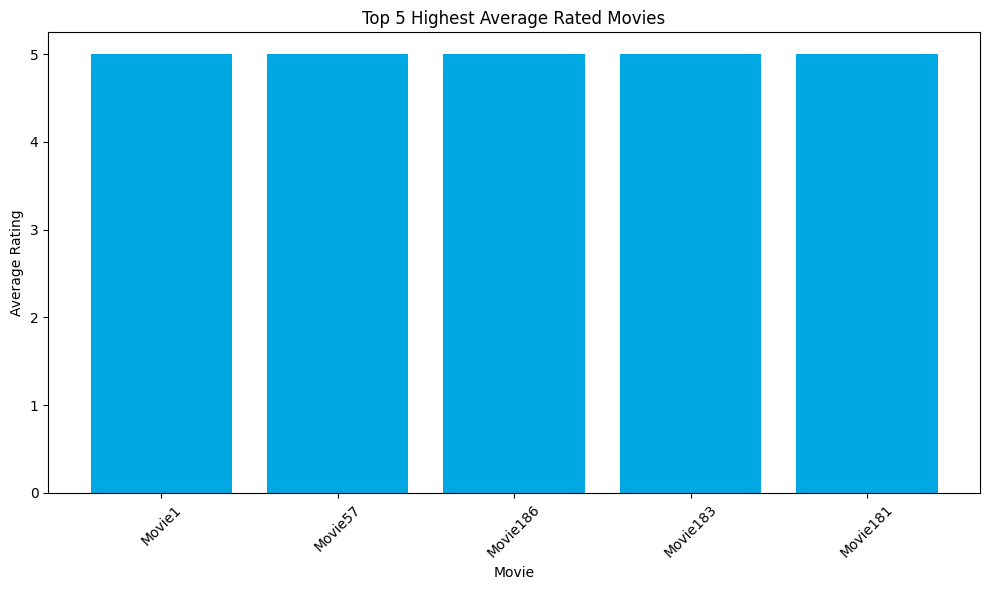

In [ ]:
average_ratings = movies.groupby('Movie')['Rating'].mean().reset_index()

# Sort movies by average rating in descending order and take top 5
top5_rated = average_ratings.sort_values(by='Rating', ascending=False).head(5)

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(top5_rated['Movie'], top5_rated['Rating'], color='#00A8E1')
plt.xlabel('Movie')
plt.ylabel('Average Rating')
plt.title('Top 5 Highest Average Rated Movies')
plt.xticks(rotation=45)
plt.tight_layout()

# Show plot
plt.show()

**Top 5 Most Watched Amazon Movies by Average Rating**

        Movie  Average Rating  Total Ratings
31   Movie127        4.111976           2313
46   Movie140        4.833910            578
67    Movie16        4.518750            320
5    Movie103        4.562500            272
128   Movie29        4.806584            243


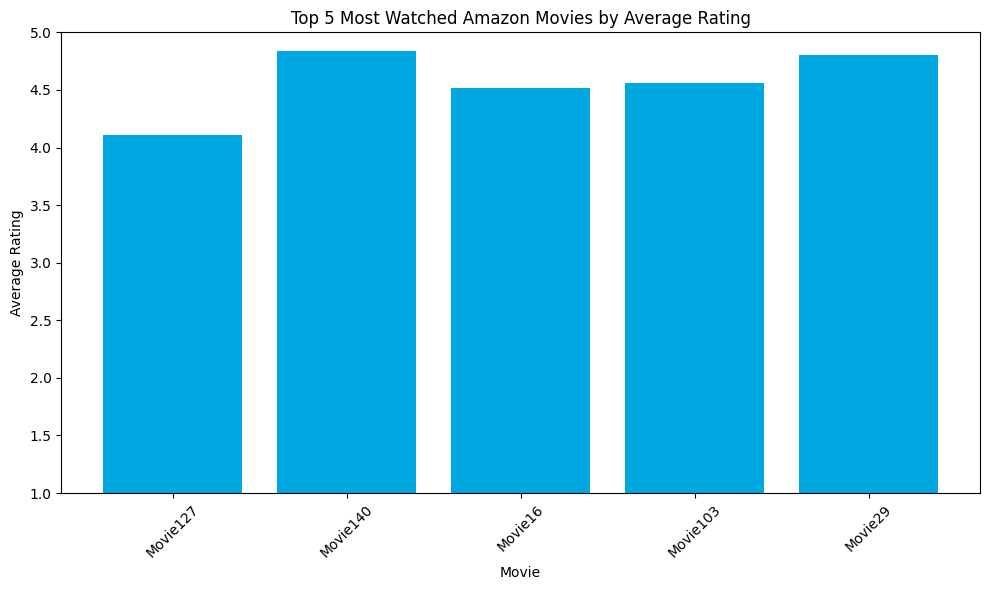

In [ ]:
average_ratings = movies.groupby('Movie')['Rating'].agg(['mean', 'count']).reset_index()
average_ratings.columns = ['Movie', 'Average Rating', 'Total Ratings']
average_ratings = average_ratings.sort_values(by='Total Ratings', ascending=False)

top5 = average_ratings.head(5)
print(top5)


plt.figure(figsize=(10, 6))
plt.bar(top5['Movie'], top5['Average Rating'], color='#00A8E1')
plt.xlabel('Movie')
plt.ylabel('Average Rating')
plt.title('Top 5 Most Watched Amazon Movies by Average Rating')
plt.xticks(rotation=45)
plt.ylim(1, 5)  # Setting y-axis range from 1 to 5
plt.tight_layout()

# Show plot
plt.show()





In [ ]:
average_ratings1 = movies.groupby('user_id')['Rating'].agg(['count']).reset_index()
average_ratings1.columns = ['User_id', 'Total Ratings']
average_ratings1 = average_ratings1.sort_values(by='Total Ratings', ascending=False)
top51 = average_ratings1.head(10)
print(top51)

             User_id  Total Ratings
1659  A2AKR3QR28W09U              6
119   A137SY2CCOWTP6              5
670   A1ISBRQ8WUFE41              5
3827   A6GMEO3VRY51S              5
3070  A3E102F6LPUF1J              4
3188  A3H82LUT1EC655              4
3105  A3EVDRB2NK2UHS              4
2401  A2UBSGFCP2QFNV              3
2537  A2YP1HYB6Q0JEQ              3
2745  A34PAZQ73SL163              3


The analysis reveals that the dataset predominantly consists of users who have reviewed only 1 movie on average. Additionally, it indicates that the majority of movies receive 5 or fewer ratings. This observation aligns with the filtering criteria applied, which focused on **removing rarely rated movies (rated by less than 5 users)


In [ ]:
movie_rate = pd.DataFrame(movies.groupby("Movie",as_index = False).agg({'Rating':['count','mean']}))

In [ ]:
movie_index = movie_rate['Movie'][movie_rate['Rating']['count'] >= 5].tolist()


In [ ]:
data_filter = movies.loc[(movies['Movie'].isin(movie_index))]
data_filter = movies.fillna(0)
data_filter.head(15)

,user_id,Movie,Rating
0,A3R5OBKS7OM2IR,Movie1,5.0
1,AH3QC2PC1VTGP,Movie1,0.0
2,A3LKP6WPMP9UKX,Movie1,0.0
3,AVIY68KEPQ5ZD,Movie1,0.0
4,A1CV1WROP5KTTW,Movie1,0.0
5,AP57WZ2X4G0AA,Movie1,0.0
6,A3NMBJ2LCRCATT,Movie1,0.0
7,A5Y15SAOMX6XA,Movie1,0.0
8,A3P671HJ32TCSF,Movie1,0.0
9,A3VCKTRD24BG7K,Movie1,0.0


In [ ]:
data_filter.shape

(998688, 3)

**Train Test Split**

In [ ]:
reader = Reader(rating_scale=(0, 5))

In [ ]:
df= data_filter[['user_id','Movie','Rating']]
df.columns = ["user_id", "Movie", "Rating"]
df

,user_id,Movie,Rating
0,A3R5OBKS7OM2IR,Movie1,5.0
1,AH3QC2PC1VTGP,Movie1,0.0
2,A3LKP6WPMP9UKX,Movie1,0.0
3,AVIY68KEPQ5ZD,Movie1,0.0
4,A1CV1WROP5KTTW,Movie1,0.0
...,...,...,...
998683,A1IMQ9WMFYKWH5,Movie206,5.0
998684,A1KLIKPUF5E88I,Movie206,5.0
998685,A5HG6WFZLO10D,Movie206,5.0
998686,A3UU690TWXCG1X,Movie206,5.0


In [ ]:
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(df, test_size = 0.2, random_state=40)

In [ ]:
train_data= Dataset.load_from_df(train_data[["user_id", "Movie", "Rating"]], reader)
train_data_raw = train_data
train_data = train_data.build_full_trainset()

In [ ]:
test_data = Dataset.load_from_df(test_data[["user_id", "Movie", "Rating"]], reader)
test_data = test_data.build_full_trainset()
test_data = test_data.build_testset()

**User Based KNN**

In [ ]:
#user-Based KNN
sim_pearson = {'name':'pearson', 'user_based':True}
basic_pearson = knns.KNNBasic(sim_options=sim_pearson)
basic_pearson.fit(train_data)
predictions = basic_pearson.test(test_data)
print(accuracy.rmse(predictions))

Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.3198
0.3197859936659715


**Item Based KNN**

In [ ]:
#Item-based KNN
sim_pearson = {'name':'pearson', 'user_based':False}
basic_pearson = knns.KNNBasic(sim_options=sim_pearson)
basic_pearson.fit(train_data)
predictions = basic_pearson.test(test_data)
print(accuracy.rmse(predictions))

Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.4966
0.4966304451837458


**SVD**

In [ ]:
#SVD
k_factors = 5
algo = SVD(n_factors= k_factors, n_epochs= 200, lr_all= 0.005, reg_all= 0, init_mean= 0, init_std_dev= 0.01)
algo.fit(train_data)
test_pred = algo.test(test_data)
accuracy.rmse(test_pred)

RMSE: 0.3157


0.31568220342037845

**GridSearchCV**

In [ ]:
sim_options = {
    "name": ["msd", "pearson"],
    "min_support": [3, 4, 5],
    "user_based": [False, True],
}

param_grid = {"sim_options": sim_options}

gs = GridSearchCV(knns.KNNWithMeans, param_grid, measures=["rmse", "mae"], cv=3,)
cv = gs.fit(train_data_raw)

print(gs.best_score["rmse"])
print(gs.best_params["rmse"])

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computi

In [ ]:
knn_best = knns.KNNBasic(sim_options=gs.best_params["rmse"])
knn_best.fit(train_data)
predictions = basic_pearson.test(test_data)
print(accuracy.rmse(predictions))

Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.4966
0.4966304451837458


Created for loop to input a user ID and get top 10 recommendations for the SVD algorithm.

**Findings:** Based on the collaborative filtering analysis using the SVD algorithm, the top 10 movie recommendations for user " A3EVDRB2NK2UHS" were generated with estimated ratings ranging from 0.077 to 3.86 on a scale of 0 to 5. While these ratings provide insights into potential movie preferences, it's important to note that they are predictions based on observed data patterns and may not fully capture individual tastes. Further investigation, including user feedback and contextual factors, is essential for refining the recommendations and improving their relevance and accuracy for user enjoyment.

In [ ]:
user_id = input("Enter user ID: ")
top_n = 10

items_unrated_by_user = train_data.build_anti_testset(fill=0)

items_unrated_by_user = filter(lambda x: x[0] == user_id, items_unrated_by_user)

predictions = algo.test(items_unrated_by_user)

top_recommendations = sorted(predictions, key=lambda x: x.est, reverse=True)[:top_n]

print("Top", top_n, "recommendations for user", user_id, ":")
for pred in top_recommendations:
    print("Item ID:", pred.iid, "Estimated Rating:", pred.est)


Enter user ID: A3EVDRB2NK2UHS
Top 10 recommendations for user A3EVDRB2NK2UHS :
Item ID: Movie140 Estimated Rating: 3.8584636470849345
Item ID: Movie29 Estimated Rating: 2.5811527227276403
Item ID: Movie91 Estimated Rating: 0.3645896314225602
Item ID: Movie107 Estimated Rating: 0.10324563894569538
Item ID: Movie129 Estimated Rating: 0.09056669976686754
Item ID: Movie162 Estimated Rating: 0.08601787345316303
Item ID: Movie205 Estimated Rating: 0.08277891767307613
Item ID: Movie186 Estimated Rating: 0.08063373035427682
Item ID: Movie133 Estimated Rating: 0.07761999000852438
Item ID: Movie160 Estimated Rating: 0.07680685910797452
